# U.S. Medical Insurance Costs

# 1. Organize the data

The first step is to import the csv module to organize the Medical insurance data.
i create a list called `data_list` to store every row information like a dictionary.
i create a list for every column in the data aiming to analise the variables in differente ways and how one can be related to the other

In [30]:
import csv
from matplotlib import pyplot as plt
import numpy as np

In [31]:
data_list = []
age = []
sex = []
children = []
smoker =[]
region = []
charges = []
smoker_int = []
with open("insurance.csv", newline='') as insurance_file:
    dict_insurance_file = csv.DictReader(insurance_file)
    for row in dict_insurance_file:
        data_list.append(row)
        age.append(float(row["age"]))
        sex.append(row["sex"])
        children.append(float(row["children"]))
        smoker.append(row["smoker"])
        region.append(row["region"])
        charges.append(float(row["charges"]))
for i in smoker:
    if i == "yes":
        smoker_int.append(1)
    else: smoker_int.append(0)


# 2. Analize the data


### 2.1. Age analysis

In [32]:
median_age = 0
min_age = min(age)
max_age = max(age)
cum_age = 0 
for i in age:
    cum_age += i
median_age = round(cum_age/ len(age),2)
print(f"The youngest people in our data are {min_age} years old while the older are {max_age} years old. We have an average of {median_age} in our population")
sex_age = zip(sex,age)
m_counter = 0
f_counter = 0
m_cum_age = 0
f_cum_age = 0
for i in sex_age:
    if i[0] == "male":
        m_counter += 1
        m_cum_age += i[1]
    else: 
        f_counter += 1
        f_cum_age += i[1]
median_age_m = round(m_cum_age / m_counter, 2)
median_age_f = round(f_cum_age /f_counter, 2)
print(f"The average age of women in our data is {median_age_f} years old while the men hava and average of {median_age_m} years old.")


The youngest people in our data are 18.0 years old while the older are 64.0 years old. We have an average of 39.21 in our population
The average age of women in our data is 39.5 years old while the men hava and average of 38.92 years old.


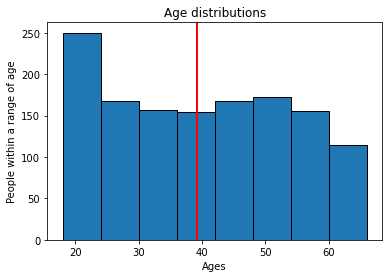

In [33]:
def interval(width_of_intervals):
    bin_i = min_age
    bins = []
    for i in range(int((max_age-min_age)//width_of_intervals)+2):
        bins.append(int(bin_i))
        bin_i += width_of_intervals
    return bins

bins = interval(6)

plt.hist(age, bins=bins,edgecolor = "black")
plt.title("Age distributions")
plt.xlabel("Ages")
plt.ylabel("People within a range of age")
plt.axvline(median_age,color="red", label = "Age Median",linewidth = 2)




In [34]:
print(f"In the Histogram we can see the ages distribution of our population with intervals divided in the next intervals: {bins}")
print()
print(f"We can see our the median represented by a red vertical line")
print()
print(f"The interval with more population is the first one with people within the ages of {bins[0]} and {bins[1]}")
print(f"The interval with less population is the last one with people within the ages of {bins[-2]} and {bins[-1]}")



In the Histogram we can see the ages distribution of our population with intervals divided in the next intervals: [18, 24, 30, 36, 42, 48, 54, 60, 66]

We can see our the median represented by a red vertical line

The interval with more population is the first one with people within the ages of 18 and 24
The interval with less population is the last one with people within the ages of 60 and 66


## 2.2. Age-charges analysis

          Men       Women
18-24   8789.0     8870.3
24-30   11231.3     8101.2
30-36   12118.3     10321.7
36-42   13086.2     10663.4
42-48   16413.1     15242.2
48-54   16178.2     14847.3
54-60   17423.0     15716.6
60-66   22155.3     20218.2


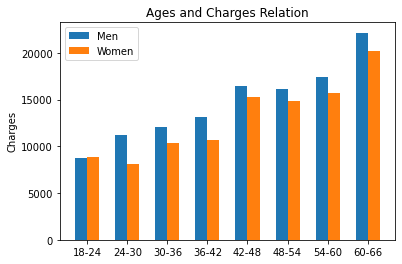

In [35]:
def age_var2(age,sex,var2,var2_name,bins,percentaje = False):
    
    dict_bins = {}
    dict_bins_m = {}
    dict_bins_f = {}
    keys = []
    for i in range(len(bins)-1):
        key = str(bins[i])+"-"+str(bins[i+1])
        keys.append(key)
        dict_bins[key] = ""
   
    for i in range(len(bins)-1):
        cum_var2 = 0
        cum_var2_m = 0
        cum_var2_f = 0
        counter_m =0
        counter_f = 0
        counter = 0
       
        
        for j in range(len(age)-1):
            
            if age[j] >= bins[i] and age[j] < bins[i+1]:
                cum_var2 += var2[j]
                counter += 1
            if age[j] >= bins[i] and age[j] < bins[i+1] and sex[j] =="male":
                cum_var2_m += var2[j]
                counter_m += 1
            if age[j] >= bins[i] and age[j] < bins[i+1] and sex[j] =="female":
                cum_var2_f += var2[j]
                counter_f += 1
        dict_bins[keys[i]] = cum_var2 / counter
        dict_bins_m[keys[i]] = cum_var2_m / counter_m
        dict_bins_f[keys[i]] = cum_var2_f / counter_f
    
    
    
    charge_means = [dict_bins[val] for val in keys]
    charge_means_m = [dict_bins_m[val] for val in keys]
    charge_means_f = [dict_bins_f[val] for val in keys]
    
    fig, ax = plt.subplots()
    x = np.arange(len(keys))
    width = 0.3
    men_bar = ax.bar(x - width/2, charge_means_m, width, label='Men')
    women_bar = ax.bar(x + width/2, charge_means_f, width, label='Women')
     
    ax.set_ylabel(var2_name)
    ax.set_title('Ages and '+ str(var2_name)+ ' Relation')
    ax.set_xticks(x)
    ax.set_xticklabels(keys)
    ax.legend()
    
    print("     ","    Men    ","  Women")
    if percentaje == True:
        for i in range(len(keys)):
            print(keys[i]," ",round(charge_means_m[i]*100,1),"%","   ",round(charge_means_f[i]*100,1),"%")
    else:   
        for i in range(len(keys)):
            print(keys[i]," ",round(charge_means_m[i],1),"   ",round(charge_means_f[i],1))
    

    
age_var2(age,sex,charges,"Charges",bins)        
  

As expected we can see that the charges are growing with the range age.
additionaly we can observe in the plot that the men pay more charges in almost all ranges of age that women.

# Why are men been chargin more than women?

          Men       Women
18-24   0.6     0.6
24-30   1.2     0.9
30-36   1.6     1.3
36-42   1.6     1.6
42-48   1.6     1.2
48-54   1.2     1.4
54-60   0.7     1.1
60-66   0.6     0.6


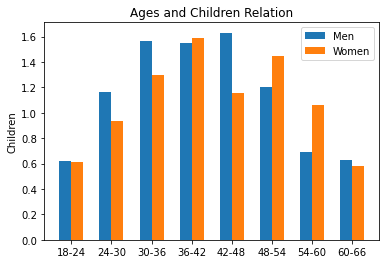

In [36]:
age_var2(age,sex,children,"Children",bins)   

          Men       Women
18-24   21.5 %     21.7 %
24-30   24.4 %     13.6 %
30-36   27.5 %     16.9 %
36-42   23.1 %     15.8 %
42-48   28.6 %     26.2 %
48-54   21.2 %     13.8 %
54-60   18.2 %     7.6 %
60-66   25.0 %     21.1 %


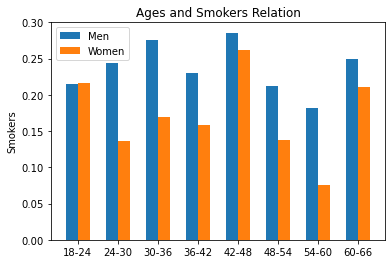

In [37]:
age_var2(age,sex,smoker_int,"Smokers",bins,True) 

From the plot we can say. There is a reltion between the charges, sex, if they have children and if they are smokers.
The older the person more expensive the charges.
Men pay more than women in the same range of age because they smoke more than women or the have more children than women.

# Is there a relation between the region and the charges?

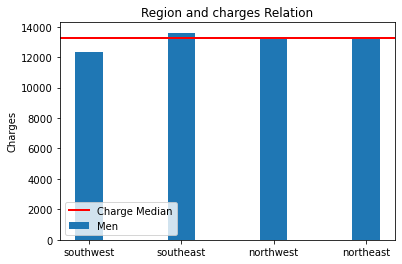

In [38]:
def region_plot(region,charge):
    region_u = []
    mean_charge_per_region =[]
    counter = 0
    cum_charge_per_region = 0
    median_charge = 0
    for i in charge:
        median_charge += i
    median_charge /= len(charge)     
    for r in region:
        if r not in region_u:
            region_u.append(r)
    counter = 0
    for i in range(len(region_u)):
        for j in range(len(region)):
            if region[j] == region_u[i]:
                counter += 1
                cum_charge_per_region += charge[j]                
        mean_charge_per_region.append(round(cum_charge_per_region / counter,2))      
    fig, ax = plt.subplots()
    x = np.arange(len(mean_charge_per_region))
    width = 0.3
    region_bar = ax.bar(x, mean_charge_per_region, width, label='Men')
    plt.axhline(median_charge,color="red", label = "Charge Median",linewidth = 2)
   
    ax.set_ylabel("Charges")
    ax.set_title('Region and charges Relation')
    ax.set_xticks(x)
    ax.set_xticklabels(region_u)
    ax.legend()
    
region_plot(region,charges)   

We can see that there isn't a huge difference in ther charges in every region the people pay less in the `southwest` region but is not a important difference


# Conclusions

1. The range of age with more people in our population in the range `18-24` and the range `60-66` have less population, in the other intervals the population within them is almost the same
2. Is clear that the charge are more expensive when the person is older 
3. Men are paying more charges than women in almost every interval of age
4. In our population Men Smoke more. That could be the main reason in the difference of charges.
5. The region dont show any important influence in the charges




# Questions?

In this project i choose the age intervals subjectively.

there is a context which a relevant and specifics range of ages in which the data could be analized different?
